In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re
import string
import nltk
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.tokenize import word_tokenize, TweetTokenizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2.Importing Data

In [3]:
data = pd.read_csv('Elon_musk.csv', sep=',', encoding='latin-1')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [5]:
data.describe()


,Text
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [6]:
data[data.duplicated()]


,Text
324,The most entertaining outcome is the most likely
655,@westcoastbill Indeed


In [7]:
data.drop_duplicates(inplace=True)
data.reset_index(drop='index')


,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
data.shape


(1997, 1)

In [9]:
dta = data.copy()


# Text Data Preprocessing

In [10]:
data = [Text.strip() for Text in data.Text]


In [11]:
data = [Text for Text in data if Text]
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixi

In [12]:
data = pd.DataFrame(data, columns=['tidy_text'])
data


,tidy_text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", str(text)) # Remove Mentions
    text = re.sub(r"#", "", str(text)) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", str(text)) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", str(text)) # Remove The Hyper Link
    text = re.sub("[\d]+", "", str(text)) #Removing the strings which contains unnecessary digits in data
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuations
    text = re.sub("[\W]+", " ", str(text))   #Removing the strings which contains unnecessary digits in data
    text = re.sub('[%s]+' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
    text = re.sub('\W*\d\W*', '', text)
    text = re.sub('^ ', '', text)
    text = str.lower(text)
    
    return text


In [14]:
data['Clean_Tweets'] = data['tidy_text'].apply(lambda x: cleantext(x))
data


,tidy_text,Clean_Tweets
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf


# Removing Stopwords

In [15]:
my_stop_words = stopwords.words('english')

sw_list = ['rt','ye','yeah','haha','Yes','x', 's', 'ð', 'pron', 'ufuf', 'amp']
my_stop_words.extend(sw_list)
cleaned_tweets = []

for index, row in data.iterrows():
    clean_data = [word for word in row.Clean_Tweets.split() if not word in my_stop_words]
    cleaned_tweets.append(' '.join(clean_data))

data['Fully_clean_tweet'] = cleaned_tweets
data


,tidy_text,Clean_Tweets,Fully_clean_tweet
0,@kunalb11 Im an alien,i m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel ...
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
...,...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,true sounds surreal negative propaganda still ...
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,make sure read ur terms conditions clicking ac...
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf,altho dumb dumber


In [16]:
data

,tidy_text,Clean_Tweets,Fully_clean_tweet
0,@kunalb11 Im an alien,i m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel ...
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
...,...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,true sounds surreal negative propaganda still ...
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,make sure read ur terms conditions clicking ac...
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf,altho dumb dumber


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [22]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...


True

In [23]:
from nltk import tokenize


In [24]:
sid = SentimentIntensityAnalyzer()

In [29]:
data['sentiment_compound_polarity']=data.tidy_text.apply(lambda x:sid.polarity_scores(x)['compound'])
data['sentiment_neutral']=data.tidy_text.apply(lambda x:sid.polarity_scores(x)['neu'])
data['sentiment_negative']=data.tidy_text.apply(lambda x:sid.polarity_scores(x)['neg'])
data['sentiment_positive']=data.tidy_text.apply(lambda x:sid.polarity_scores(x)['pos'])
data['sentiment_type']=''
data.loc[data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
data.loc[data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
data.shape
data.head()


,tidy_text,Clean_Tweets,Fully_clean_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type
0,@kunalb11 Im an alien,i m an alien,alien,0.0000,1.000,0.000,0.000,NEUTRAL
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel ...,0.0000,1.000,0.000,0.000,NEUTRAL
2,@joerogan @Spotify Great interview!,great interview,great interview,0.6588,0.406,0.000,0.594,POSITIVE
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,-0.2732,0.588,0.412,0.000,NEGATIVE
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...,0.8513,0.644,0.000,0.356,POSITIVE


###  We can see the individual analysis of Elon Musks tweets.
###  We can further analyze the Polarity of his tweets to get a better picture.
###   Whether his tweets are Positive Negative of Neutral.


In [36]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install -U textblob


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# Method 2: Sentiment Analysis


In [30]:
!pip install wordcloud


In [42]:
import os
import numpy as np
import keras
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import math
import nltk
import csv
import sklearn
import plotly.offline as py
import plotly.graph_objs as go
import textblob



from math import sqrt
from matplotlib import pyplot
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import mean_squared_error
from textblob import TextBlob
from nltk.corpus import stopwords

from pandas import DataFrame

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
#nltk.download('stopwords')

py.init_notebook_mode(connected = True)
%matplotlib inline
#os.getcwd()

In [44]:
tweets=pd.read_csv("Elon_musk.csv",encoding="ISO-8859-1")
tweets.shape
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [55]:
# Data Cleanse #
tweets['Text'] = tweets['Text'].str.replace(r'http\S+', " ", case=False) # Remove HTML
tweets['Text'] = tweets['Text'].str.replace('RT @[\w]*', " ", case=False)
tweets['Text'] = tweets['Text'].str.replace('&gt', " ", case=False)
tweets['Text'] = tweets['Text'].str.replace("[^a-zA-Z#]", " ", case=False) #Non-letters
tweets['Text'] = tweets['Text'].str.replace("www", " ", case=False)


In [57]:
# Test - Remove words < 3 characters (to remove stop words)#
tweets2 = tweets.copy()
tweets2['CText'] = tweets2['Text'].apply(lambda x: ' '.join([w for w in x.split() if
len(w)>3]))


In [58]:
#Tokenizer#
tokens = tweets2['CText'].apply(lambda x: x.split())
tokens.head()

0                                      [kunalb, alien]
1    [Carmack, tracing, Cyberpunk, with, next, leve...
2                [joerogan, Spotify, Great, interview]
3                        [gtera, Doge, underestimated]
4    [teslacn, Congratulations, Tesla, China, amazi...
Name: CText, dtype: object

In [59]:
tweets2.tail()


,Text,CText
1994,flcnhvy True it sounds so surreal but the n...,flcnhvy True sounds surreal negative propagand...
1995,PPathole Make sure to read ur terms amp con...,PPathole Make sure read terms conditions befor...
1996,TeslaGong PPathole Samwise Gamgee,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is U F ...,PPathole Altho Dumb Dumber
1998,Progress update August,Progress update August


In [61]:
#Remove common words + stop words - NLTK #
# play, player, played, plays --> play #

stop_words = set(stopwords.words('english'))
from nltk.stem.porter import *
stemmer = PorterStemmer() #stemming
tokens = tokens.apply(lambda x: [stemmer.stem(i) 
                                 for i in x])

for i in range(len(tokens)):
    tokens[i] = ' '.join(tokens[i])


tweets2['Tokens'] = tokens
tweets2['Text'].replace('', np.nan, inplace=True)
tweets2.dropna(subset=['Text'], inplace=True)
tweets2.head()


,Text,CText,Tokens
0,kunalb I m an alien,kunalb alien,kunalb alien
1,ID AA Carmack Ray tracing on Cyberpunk with H...,Carmack tracing Cyberpunk with next level Have...,carmack trace cyberpunk with next level have tri
2,joerogan Spotify Great interview,joerogan Spotify Great interview,joerogan spotifi great interview
3,gtera Doge is underestimated,gtera Doge underestimated,gtera doge underestim
4,teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China amazing ex...,teslacn congratul tesla china amaz execut last...


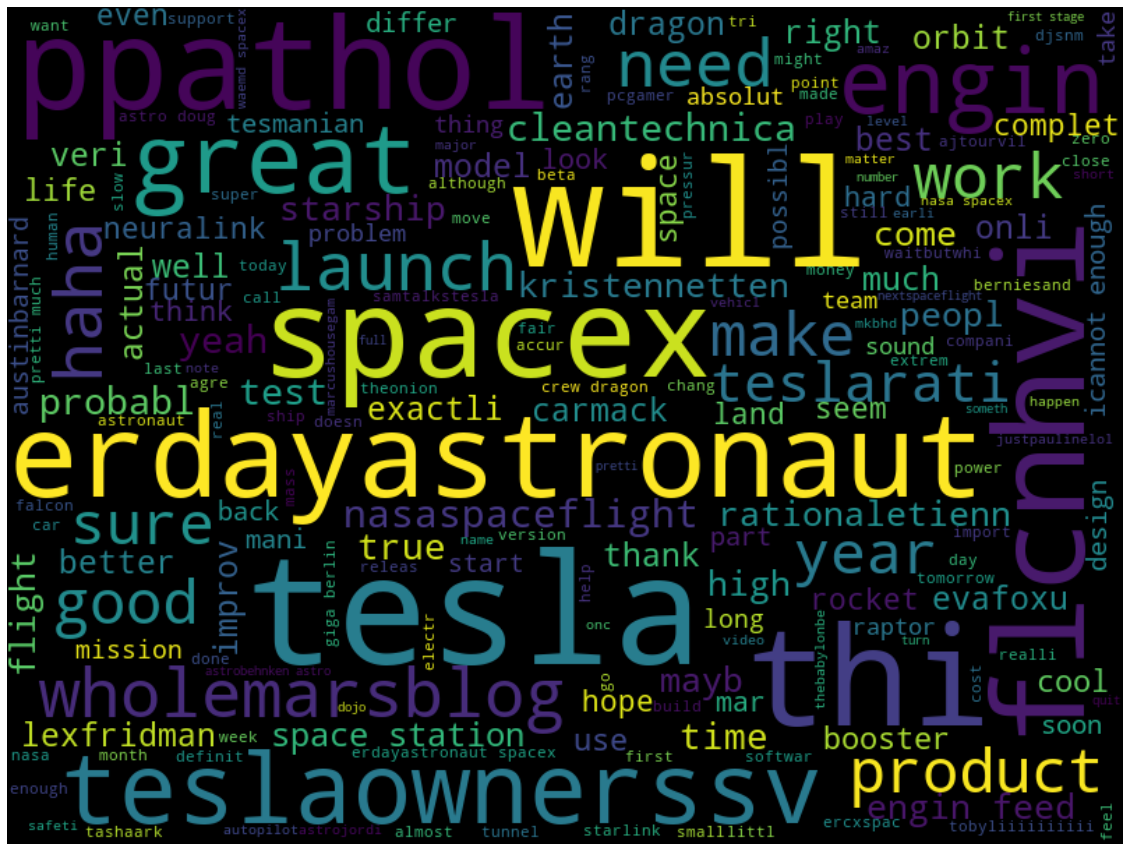

In [62]:
all_words = ' '.join([text for text in tweets2['Tokens']])
wordcloud = WordCloud(width=800,
                      height=600,
                      random_state=21,
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



## We can see that most of his tweets are about:

#### SoaceX mission launches.

#### Tesla Models(Electric Vehicals)

#### Future Projects

#### Launches

#### Products

# Text Blob- Sentiment Analysis (Polarity)

In [64]:
def sentiment(x):
    sentValue = TextBlob(x)
    return sentValue.sentiment.polarity

tweets2['sentiment'] = tweets2['Text'].apply(sentiment)

conditions = [
    (tweets2['sentiment'] > 0 ), #Positive
    (tweets2['sentiment'] < 0), #Negative
    (tweets2['sentiment'] == 0)] #Neutral

choices = ['positive', 'negative', 'neutral']
tweets2['Pol_Name'] = np.select(conditions, choices, default=' ')
#tweets2

In [65]:
#Total Stats#
print('total tweets', len(tweets2))
print('positive tweets', sum(tweets2['Pol_Name'] == 'positive')/len(tweets2)*100, '%')
print('negative tweets', sum(tweets2['Pol_Name'] == 'negative')/len(tweets2)*100, '%')
print('neutral tweets',sum(tweets2['Pol_Name'] == 'neutral')/len(tweets2)*100, '%')

total tweets 1999
positive tweets 44.772386193096544 %
negative tweets 11.605802901450724 %
neutral tweets 43.621810905452726 %


# Insights:

#### We can see that most of Elon Musks tweets are Positive (44%).
#### We can also observe most of his tweets are Neutral (43%).
#### Almost 11% of his tweets are Negative.
